In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), os.pardir, 'src')) 

In [2]:
#Temporary
import numpy as np
import pandas as pd

In [3]:
from data.extraction import Data

In [4]:
data = Data()

In [5]:
data.extract('raw', 'reto_precios.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

In [6]:
#def clean_main_name(df=data.raw):
#    for name in df['main_name']:
#        [word for word in df['main_name'] if word not in df['location'].split()]

In [7]:
def remove_duplicated_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes features that have the same data as other features. 
    Input:
    
    Returns:
    New dataframe without duplicated data.
    """
    # Assert features are really duplicated. And run a baseline, showing that is safe to delete the following columns, given that linear regression sets values of close to 0 for them.
    
    df.drop(['id', # PK: here it is not useful.
             'address', # Subset of the feature "location".
             'link', # The link by itself is not useful. Nevertheless, I might consider its use as an external source of information.
             'price_mod', # The problem we are solving is a function of price_mod. If we leave it we can use it to compute price_mod / m2 and get price_square_meter. In this case, it would be useless to use other features.
             #'m2', # The problem we are solving is a function of m2. If we leave it we can use it to compute price_mod / m2 and get price_square_meter. In this case, it would be useless to use other features.
             #'final_price', # The problem we are solving is a function of final_price. If we leave it we can use it to compute price_mod / m2 and get price_square_meter. In this case, it would be useless to use other features.
             'price', # The problem we are solving is a function of price. If we leave it we can use it to compute price_mod / m2 and get price_square_meter. In this case, it would be useless to use other features.
             'attributes', # This feature's data has been extracted, and used to make new features. Such as: m2, num_bedrooms.
             'main_name', # The information here is either trivial or has been used to make new features. Such as: subtitle
             'since', # This feature's data has been extracted, and used to make new features. Such as: since_period, since_value and days_on_site.
             'age_in_years', # Doesn't have information.
             'subtitle', # Constant (no change)
             'price_currency'# Constant (no change)
            ], axis=1, inplace=True)
    
    return df   

  
    """
    Looks like "price" equals "final_price". If true remove "price"
    """
    
    #can_remove_feature = True
    #for price, price_text in list(zip(df['final_price'],df['price'])):
    #    if str(int(price)) not in price_text.split():
    #        print('Can not remove "price" feature, given that not all rows are equivalent to "final_price" feature')
    #        can_remove_feature = False
    #if can_remove_feature: 
    #    df.drop('price', axis=1 ,inplace=True)
    #    print(f'Removed "price" given that "price_final" = "price"')
    
    
    """
    Remove columns that have the same values on all rows
    """
    #if len(df.columns) < 2:
    #    return df
    #for index, feature1 in enumerate(df):
    #    for feature2 in df.columns[index+1:]:
    #        if df[feature1].equals(df[feature2]):
    #            df.drop(feature2, axis=1, inplace=True)
    #            print(f'Removed "{feature2}" given that "{feature1}" = "{feature2}"')
                
    """
    "attributes" appear equal to "num_bedrooms" and "m2". Verify and remove "attributes" if equal.
    """
    #not_found_values_count = 0
    #for index, row in enumerate(df['attributes']):
    #    values = ' '.join(row.split(',')).split()
    #    if str(df['num_bedrooms'][index].astype(int)) not in values and str(df['m2'][index].astype(int)) not in values:
    #        print(f"{str(df['num_bedrooms'][index])} or {str(df['m2'][index])} are not in {values}")
    #        not_found_values_count += 1 
    #if not_found_values_count == 0:
    #    df.drop(['attributes'], axis=1, inplace=True)
        
    """
    "Since" this feature's data has been extracted, and used to make new features. Such as: since_period, since_value and days_on_site.
    """
    #def get_total_days_since_publication(df):
    #    for index, row in enumerate(df['since']):
    #        row = row.replace('días', '1')
    #        row = row.replace('día', '1')
    #        row = row.replace('meses', '30')
    #        row = row.replace('mes', '30')
    #        row = row.replace('años', '365')
    #        row = row.replace('año', '365')

    #        text = row.split()
    #        values = []
    #        for string in text:
    #            if string.isdigit():
    #                values.append(int(string))
    #        df['since'][index] = np.prod(values)
    #    #df['since'].astype('int')
    #    return df


In [8]:
# Find the first dtype different from NoneType in a series
def find_dtype(series):
    for value in series:
        if type(value) != type(None):
            return type(value)
        
def fix_nans(df):
    for feature in df:
        #if find_dtype(series=trxn[str(feature)]) == pd._libs.tslibs.nattype.NaTType:
        #    trxn[str(feature)].fillna('NA', inplace=True)
        if find_dtype(series=df[str(feature)]) == int or find_dtype(series=df[str(feature)]) == float:
            df[str(feature)].fillna(0, inplace=True)
        else:
            df[str(feature)].fillna('NA', inplace=True)
    return df

def fix_monthly_fee(df):
    for index, row in enumerate(df['monthly_fee']):
        text = row.split()
        for string in text:
            if string.isdigit():
                df.loc[index, 'monthly_fee'] = int(string)
                break
            else:
                df.loc[index, 'monthly_fee'] = 0
            #print(text, df['monthly_fee'][index])
    df['monthly_fee'] = df['monthly_fee'].astype('int')
    return df

In [9]:
def get_cat_codes(df, categorical_features):
    df[categorical_features]=df[categorical_features].astype('category')
    
    for feature in categorical_features:
        df[feature] = df[feature].cat.codes
        
    return df


def sort_df_dtype(df):
    
    objects = df[df.select_dtypes(include='object').columns]
    categories = df[df.select_dtypes(include='int8').columns]
    integers = df[df.select_dtypes(include='int').columns]
    floats = df[df.select_dtypes(include='float').columns]
    
    return pd.concat([objects, categories, integers, floats], axis=1)


def normalize_features(df):
    new_df = df.select_dtypes(['int8', 'int16', 'int32', 'int64', 'float64', 'float16', 'float32'])
    
    mean = new_df.mean()
    std = new_df.std()
    new_df = (new_df - mean) / std
    
    return new_df

# Extract, Transform, Load (ETL)

In [11]:
# Applied priciples "Dimensionality reduction", "Better perfomance: Optimized size of data", "Converted text classes to categorical codes"

In [12]:
df = remove_duplicated_features(df=data.raw.copy())

In [13]:
df = fix_nans(df)

In [14]:
df = fix_monthly_fee(df)

In [24]:
categorical_features = ['vendor',
                        'since_period',
                        'disposition',
                        'orientation',
                        'department_type']
df = get_cat_codes(df, categorical_features=categorical_features)

In [25]:
df = sort_df_dtype(df)

In [26]:
df = normalize_features(df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   since_period          981 non-null    float64
 1   disposition           981 non-null    float64
 2   orientation           981 non-null    float64
 3   department_type       981 non-null    float64
 4   since_value           981 non-null    float64
 5   monthly_fee           981 non-null    float64
 6   parking_lots          981 non-null    float64
 7   lat                   981 non-null    float64
 8   lon                   981 non-null    float64
 9   days_on_site          981 non-null    float64
 10  amenities             981 non-null    float64
 11  bathrooms             981 non-null    float64
 12  cellars               981 non-null    float64
 13  num_floors            981 non-null    float64
 14  apartments_per_floor  981 non-null    float64
 15  floor_situated        9

# Exploratory Data Analysis (EDA)

In [28]:
# Clustering of departments for sale, data distribution, visualizations.

In [29]:
#Temporary
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

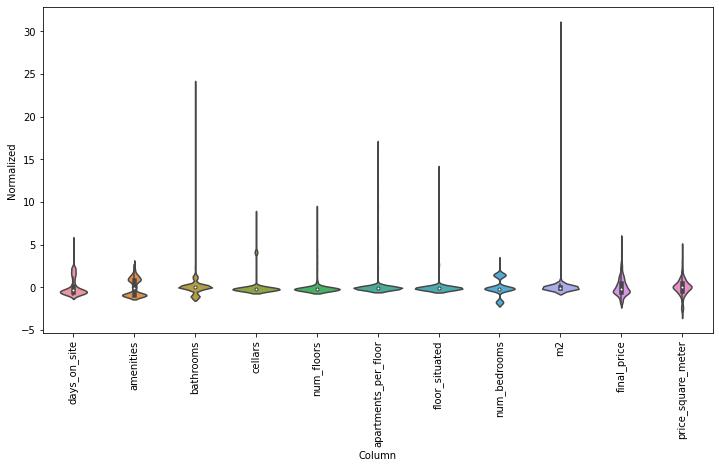

In [30]:
features = df.iloc[:,9:]
x_labels = features.columns
features = features.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=features)
_ = ax.set_xticklabels(x_labels, rotation=90)

In [31]:
# Once the function parameters have been set we can visualize price_square_meter vs some_feature.

# Feature engineering

In [32]:
#Download external data. Engineer new features. 

### Geocoding web service

    Used to correctly extract the location data. Since we have the (lat, lon) coordinates we can find the address attributes. 
    It is better this way, because the first record in our dataset has an incorrect neighbourhood "Roma Sur". 
    The correct neighbourhood is "Roma Norte" since "Calle Sinaloa 20" is located in the neighbourhood "Roma Norte".

In [33]:
#Temporary
from geopy.geocoders import Nominatim

In [34]:
def get_location_attributes(data=data.raw):
    
    mayoralties = get_mayoralties()
    
    location_data = {'road': [], 'neighbourhood': [], 'postcode': [], 'mayoralty': [],
                    'city': [], 'state': [], 'country': []}
    geolocator = Nominatim(user_agent="uteyechea@gmail.com")
    for i in range(len(data)):
        lat = data['lat'][i]
        lon = data['lon'][i]
        location = geolocator.reverse(f"{str(lat)}, {str(lon)}")
        
        try:
            location_data['road'].append(location.raw['address']['road'])
        except:
            location_data['road'].append('NA')
            
        try:    
            location_data['neighbourhood'].append(location.raw['address']['neighbourhood'].replace('Colonia ', ''))
        except:
            location_data['neighbourhood'].append('NA')
            
        try:
            location_data['postcode'].append(location.raw['address']['postcode'])
        except:
            location_data['postcode'].append('NA')
               
        try:
            mayoralty = [string.strip() for string in location.raw['display_name'].split(',') if string.strip() in mayoralties][0]
            location_data['mayoralty'].append(mayoralty)
        except:
            location_data['mayoralty'].append('NA')
            
        try:
            location_data['city'].append(location.raw['address']['city'])
        except:
            location_data['city'].append('NA')
            
        try:
            location_data['state'].append(location.raw['address']['state'])
        except:
            location_data['state'].append('NA')
            
        try:
            location_data['country'].append(location.raw['address']['country'])
        except:
            location_data['country'].append('NA')     
        
    location_data = pd.DataFrame(location_data)
        #if save_to_disk:
        #    location_data = pd.DataFrame(location_data)
        #    location_data.to_csv(os.path.join(data.data_dir, 'external', 'location_data.csv'))
    
    return location_data

def add_location_attributes(df: pd.DataFrame(), location_data: pd.DataFrame): 
    try:
        df.drop('location', axis=1, inplace=True)
    except:
        pass
    new_df = pd.concat([location_data, df], axis=1)
    return new_df

### Índice de Desarrollo Social de la Ciudad de México, 2020 

    Es una medida ponderada que integra las dimensiones de vivienda, 
    acceso a servicios sanitarios (agua, drenaje y excusado), 
    adecuación energética, acceso a internet y disponibilidad de telefonía (fija o celular), 
    así como el rezago educativo, el acceso a los servicios de salud y a la seguridad social.

In [35]:
def get_idsm():
    indice_desarrollo_social = pd.read_csv(os.path.join(data.data_dir, 'external', 'ids_alcaldias.csv')).fillna('NA')
    return indice_desarrollo_social

def get_mayoralties():
    indice_desarrollo_social = get_idsm()
    mayoralties = indice_desarrollo_social['alcaldia'].unique()
    return mayoralties

In [36]:
def add_idsm(df):
    desarrollo_social = get_idsm()
    
    ids = {'ids': []}
    for i, mayoralty in enumerate(df['mayoralty']):
        ids['ids'].append(desarrollo_social[desarrollo_social['alcaldia']==mayoralty].iloc[0,3])
    
    ids = pd.DataFrame(ids)
    new_df = pd.concat([ids, df], axis=1)
    return new_df

In [37]:
geolocator = Nominatim(user_agent="uteyechea@gmail.com") 
lat = 19.409823
lon = -99.162138
location = geolocator.reverse(f"{str(lat)}, {str(lon)}")
location.raw

{'place_id': 69155380,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 6397219114,
 'lat': '19.4098754',
 'lon': '-99.16204',
 'display_name': 'Taco Game, 27, Calle Nayarit, Centro Urbano Benito Juárez, Cuauhtémoc, Ciudad de México, 06760, México',
 'address': {'amenity': 'Taco Game',
  'house_number': '27',
  'road': 'Calle Nayarit',
  'neighbourhood': 'Centro Urbano Benito Juárez',
  'city': 'Ciudad de México',
  'ISO3166-2-lvl4': 'MX-CMX',
  'postcode': '06760',
  'country': 'México',
  'country_code': 'mx'},
 'boundingbox': ['19.4098254', '19.4099254', '-99.16209', '-99.16199']}

### Code execution

In [38]:
location_data = get_location_attributes()
df = add_location_attributes(df, location_data)
df = add_idsm(df)

In [43]:
df

,since_period,disposition,orientation,department_type,since_value,monthly_fee,parking_lots,lat,lon,days_on_site,amenities,bathrooms,cellars,num_floors,apartments_per_floor,floor_situated,num_bedrooms,m2,final_price,price_square_meter
0,-0.917017,-10.461111,-0.084732,-0.203369,-0.639772,-0.100703,1.388418,-0.187682,0.096365,-0.843209,0.404492,0.033304,-0.234233,0.533379,-0.109835,-0.129827,-0.165803,0.065523,0.982213,0.507938
1,-0.917017,0.136841,-0.084732,-0.203369,-0.518937,-0.100703,-0.687859,-0.187914,0.097417,-0.826084,-0.043371,-1.093282,-0.234233,-0.238369,-0.109835,-0.129827,-1.760434,-0.249670,-0.646908,0.926867
2,-0.917017,0.136841,-0.084732,-0.203369,-0.700190,-0.100703,1.388418,-0.198537,0.100160,-0.851771,-0.939097,1.159889,8.436817,2.076876,-0.109835,-0.129827,1.428829,0.220960,0.670389,-0.589609
3,0.703872,0.136841,5.852569,4.912151,-0.639772,2.870028,-0.687859,-0.200806,0.102837,0.398339,-0.043371,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,-0.081279,-0.737721,-0.933297
4,-0.917017,0.136841,-0.084732,-0.203369,2.199848,-0.100703,-0.687859,-0.188988,0.109748,-0.440776,0.852355,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,-0.038102,0.202292,0.223362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-0.917017,0.136841,-0.084732,-0.203369,1.474839,-0.100703,1.388418,-0.200175,0.101481,-0.543525,-0.939097,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,0.121653,0.082688,-0.798960
977,-0.917017,0.136841,-0.084732,-0.203369,1.474839,-0.100703,-0.687859,-0.200175,0.101481,-0.543525,-0.939097,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,-0.120139,-0.697818,-0.623414
978,-0.917017,0.136841,-0.084732,-0.203369,1.474839,-0.100703,-0.687859,-0.200175,0.101481,-0.543525,-0.939097,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,-0.102868,-0.656540,-0.668099
979,0.703872,0.136841,-0.084732,-0.203369,-0.821024,-0.100703,1.388418,-0.192885,0.102839,-0.372277,-0.939097,0.033304,-0.234233,-0.238369,-0.109835,-0.129827,-0.165803,0.009393,0.163566,-0.154070


# Model

In [19]:
# We will use a linear regresion model. It is a simple model that allows to compute price_per_square as a function of all available features. It will also allow us to see the distribution of weights associated with each feature.

In [44]:
#Temporary
import tensorflow as tf

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, use_bias=True)
])

### Before external data

In [46]:
train_df = df.iloc[:, 8:-1]
target_df = df.iloc[:, -1:]

In [47]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(train_df, target_df, epochs=100, verbose=1)

Epoch 1/100
31/31 [==============================] - 0s 521us/step - loss: 2.4524 - mean_absolute_error: 0.8753
Epoch 2/100
31/31 [==============================] - 0s 521us/step - loss: 2.3154 - mean_absolute_error: 0.8501
Epoch 3/100
31/31 [==============================] - 0s 521us/step - loss: 2.2012 - mean_absolute_error: 0.8318
Epoch 4/100
31/31 [==============================] - 0s 521us/step - loss: 2.0928 - mean_absolute_error: 0.8149
Epoch 5/100
31/31 [==============================] - 0s 521us/step - loss: 2.0012 - mean_absolute_error: 0.8016
Epoch 6/100
31/31 [==============================] - 0s 367us/step - loss: 1.9121 - mean_absolute_error: 0.7883
Epoch 7/100
31/31 [==============================] - 0s 521us/step - loss: 1.8335 - mean_absolute_error: 0.7775
Epoch 8/100
31/31 [==============================] - 0s 521us/step - loss: 1.7536 - mean_absolute_error: 0.7663
Epoch 9/100
31/31 [==============================] - 0s 521us/step - loss: 1.6825 - mean_absolute_error:

31/31 [==============================] - 0s 0s/step - loss: 0.5689 - mean_absolute_error: 0.5587
Epoch 74/100
31/31 [==============================] - 0s 100us/step - loss: 0.5672 - mean_absolute_error: 0.5578
Epoch 75/100
31/31 [==============================] - 0s 434us/step - loss: 0.5657 - mean_absolute_error: 0.5572
Epoch 76/100
31/31 [==============================] - 0s 521us/step - loss: 0.5638 - mean_absolute_error: 0.5564
Epoch 77/100
31/31 [==============================] - 0s 521us/step - loss: 0.5626 - mean_absolute_error: 0.5561
Epoch 78/100
31/31 [==============================] - 0s 521us/step - loss: 0.5613 - mean_absolute_error: 0.5556
Epoch 79/100
31/31 [==============================] - 0s 521us/step - loss: 0.5595 - mean_absolute_error: 0.5548
Epoch 80/100
31/31 [==============================] - 0s 521us/step - loss: 0.5587 - mean_absolute_error: 0.5544
Epoch 81/100
31/31 [==============================] - 0s 534us/step - loss: 0.5572 - mean_absolute_error: 0.5540

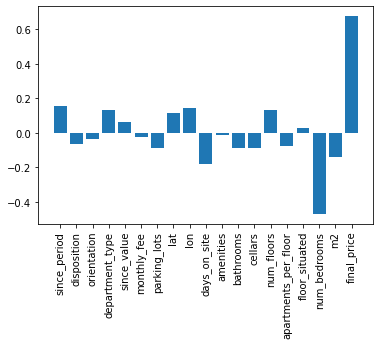

In [48]:
plt.bar(x = range(len(train_df.columns)),
        height=model.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### After external data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ids                   981 non-null    object 
 1   road                  981 non-null    object 
 2   neighbourhood         981 non-null    object 
 3   postcode              981 non-null    object 
 4   mayoralty             981 non-null    object 
 5   city                  981 non-null    object 
 6   state                 981 non-null    object 
 7   country               981 non-null    object 
 8   since_period          981 non-null    float64
 9   disposition           981 non-null    float64
 10  orientation           981 non-null    float64
 11  department_type       981 non-null    float64
 12  since_value           981 non-null    float64
 13  monthly_fee           981 non-null    float64
 14  parking_lots          981 non-null    float64
 15  lat                   9

In [50]:
categorical_features = ['ids','road',
                            'neighbourhood',
                            'postcode',
                            'mayoralty',
                            'city',
                            'state']
df = get_cat_codes(df, categorical_features=categorical_features)

In [51]:
df = sort_df_dtype(df)

In [52]:
df = normalize_features(df)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ids                   981 non-null    float64
 1   road                  981 non-null    float64
 2   neighbourhood         981 non-null    float64
 3   postcode              981 non-null    float64
 4   mayoralty             981 non-null    float64
 5   city                  981 non-null    float64
 6   state                 981 non-null    float64
 7   since_period          981 non-null    float64
 8   disposition           981 non-null    float64
 9   orientation           981 non-null    float64
 10  department_type       981 non-null    float64
 11  since_value           981 non-null    float64
 12  monthly_fee           981 non-null    float64
 13  parking_lots          981 non-null    float64
 14  lat                   981 non-null    float64
 15  lon                   9

### Model

In [55]:
train_df = df.iloc[:, :-1]
target_df = df.iloc[:, -1:]

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, use_bias=True)
])

In [57]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(train_df, target_df, epochs=100, verbose=1)

Epoch 1/100
31/31 [==============================] - 0s 534us/step - loss: 2.5369 - mean_absolute_error: 1.2045
Epoch 2/100
31/31 [==============================] - 0s 521us/step - loss: 2.2800 - mean_absolute_error: 1.1289
Epoch 3/100
31/31 [==============================] - 0s 521us/step - loss: 2.0702 - mean_absolute_error: 1.0638
Epoch 4/100
31/31 [==============================] - 0s 521us/step - loss: 1.8945 - mean_absolute_error: 1.0076
Epoch 5/100
31/31 [==============================] - 0s 521us/step - loss: 1.7494 - mean_absolute_error: 0.9557
Epoch 6/100
31/31 [==============================] - 0s 0s/step - loss: 1.6201 - mean_absolute_error: 0.9097
Epoch 7/100
31/31 [==============================] - 0s 0s/step - loss: 1.5107 - mean_absolute_error: 0.8715
Epoch 8/100
31/31 [==============================] - 0s 705us/step - loss: 1.4189 - mean_absolute_error: 0.8356
Epoch 9/100
31/31 [==============================] - 0s 350us/step - loss: 1.3347 - mean_absolute_error: 0.803

31/31 [==============================] - 0s 521us/step - loss: 0.5284 - mean_absolute_error: 0.5408
Epoch 74/100
31/31 [==============================] - 0s 521us/step - loss: 0.5271 - mean_absolute_error: 0.5408
Epoch 75/100
31/31 [==============================] - 0s 638us/step - loss: 0.5267 - mean_absolute_error: 0.5414
Epoch 76/100
31/31 [==============================] - 0s 417us/step - loss: 0.5249 - mean_absolute_error: 0.5397
Epoch 77/100
31/31 [==============================] - 0s 521us/step - loss: 0.5242 - mean_absolute_error: 0.5391
Epoch 78/100
31/31 [==============================] - 0s 521us/step - loss: 0.5237 - mean_absolute_error: 0.5389
Epoch 79/100
31/31 [==============================] - 0s 521us/step - loss: 0.5228 - mean_absolute_error: 0.5384
Epoch 80/100
31/31 [==============================] - 0s 0s/step - loss: 0.5223 - mean_absolute_error: 0.5377
Epoch 81/100
31/31 [==============================] - 0s 0s/step - loss: 0.5217 - mean_absolute_error: 0.5371
Ep

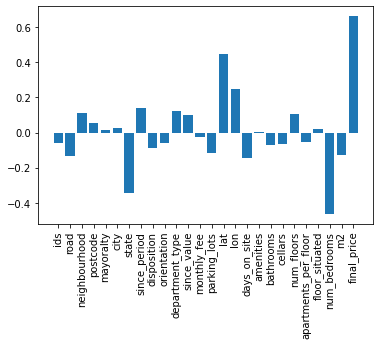

In [58]:
plt.bar(x = range(len(train_df.columns)),
        height=model.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [62]:
data.raw['description'][2]

'Concepto único en Roma Sur, es un desarrollo de 4 townhouses en 3 niveles más roof garden privado.Increíble ubicación con todo tipo de servicios a menos de 20 minutos caminando: restaurantes, parques, supermercados, etc. además de toda la vida de la colonia Roma. Acabados de última generación: en concreto aparente, mármol y madera.En planta baja cuenta con una amplia estancia con terraza y un pequeño balcón en la cocina y medio baño para visitas; en el primer nivel están dos recámaras con clóset cada una y que comparten un baño completo y el área de lavado; en el segundo nivel se encuentra la recámara principal con amplio baño y un estudio de T.V.; por último un piso más arriba está el roof garden privado de este departamento. Cuenta con dos bodegas y dos estacionamientos con elevaautos'